In [1]:
import Pkg

In [2]:
using QuantumOptics
using Plots

# One particle in a periodic potential

Length scale $d$, 

Energy scale $\hbar^2/(2md^2)$ 

In [47]:
xmax = 32
xmin = -xmax
Nsteps = xmax*3*4
L = xmax - xmin

b_position = PositionBasis(xmin, xmax, Nsteps)
xpoints = samplepoints(b_position)

x = position(b_position)
p = momentum(b_position)

m = 1

# half of wavevector of the periodic lattice wave vector
qB = pi

# strength of the sin^2(qB*z) periodic potential
s = 1.
sER = s*qB^2

potential = x -> sER*sin(qB*x)^2

#13 (generic function with 1 method)

In [48]:
# xpoints

In [49]:
#p/pi

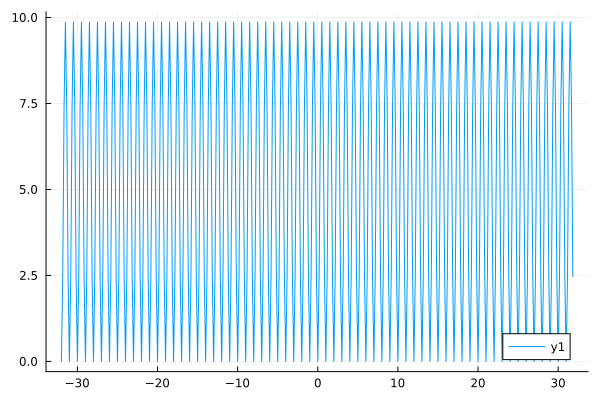

In [50]:
plot(xpoints, potential.(xpoints))
#xlim([-2,2])

In [51]:
V = potentialoperator(b_position, potential)
Hkin = p^2
H = Hkin + dense(V);

In [52]:
E, states = eigenstates((H + dagger(H))/2);

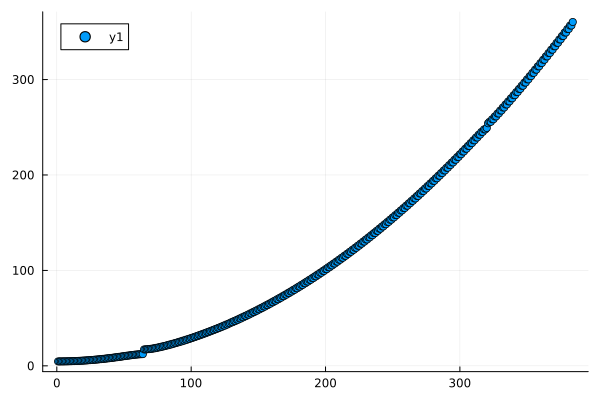

In [53]:
scatter(E)
#ylim([4,20])

In [54]:
E[1:5]

5-element Vector{Float64}:
 4.628455614496484
 4.637800376121812
 4.637800376122276
 4.665831328253437
 4.665831328253556

In [46]:
(2*pi/(L))^2/(2*m)

0.004819142773969413

In [12]:
E, states = eigenstates((H + dagger(H))/2, 10);
println(E)

[4.60868885364717, 4.645990254009989, 4.6459902540100035, 4.757837112239793, 4.757837112239809, 4.944050824587324, 4.944050824587338, 5.204310383278715, 5.204310383278729, 5.538111915143368]


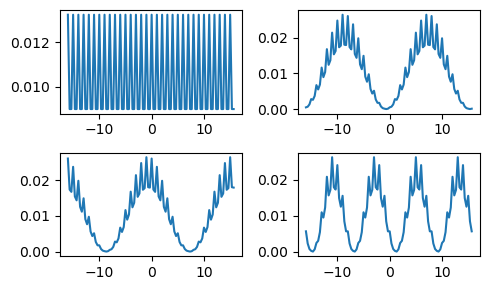

In [16]:
figure(figsize=(5, 3))
subplot(2, 2, 1)
plot(xpoints, abs2.(states[1].data))
subplot(2, 2, 2)
plot(xpoints, abs2.(states[2].data))
subplot(2, 2, 3)
plot(xpoints, abs2.(states[3].data))
subplot(2, 2, 4)
plot(xpoints, abs2.(states[4].data))
tight_layout()

In [17]:
Nparticles = 2
states = bosonstates(b_position, Nparticles)

4656-element QuantumOpticsBase.SortedVector{Vector{Int64}, Base.Order.ReverseOrdering{Base.Order.ForwardOrdering}}:
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0

In [18]:
b_mb = ManyBodyBasis(b_position, states)

ManyBody(onebodybasis=Position(xmin=-16, xmax=16, N=96), states:4656)

In [19]:
using LinearAlgebra

b2_position = b_position ⊗ b_position
x1 = embed(b2_position, 1, x)
x2 = embed(b2_position, 2, x);
r = x1 - x2

V0 = 0.1
r0 = 1
w0 = 0.01

V_SQWell = r -> V0*(tanh( (abs(r)-r0)/w0 )-1)/2  

#3 (generic function with 1 method)

/home/subasi/miniconda3/envs/gp_env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/subasi/miniconda3/envs/gp_env/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


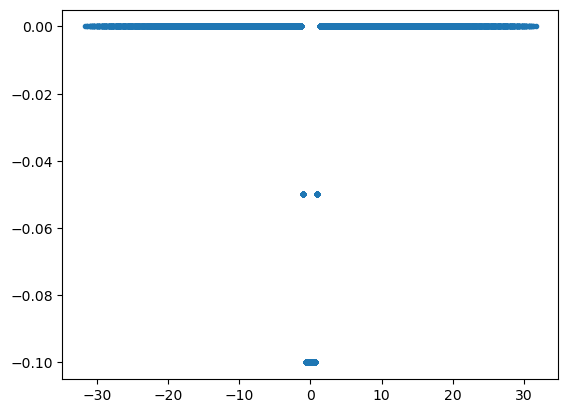

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x145fe4069a50>

In [20]:
plot(diag(r.data), V_SQWell.(diag(r.data)), ".")

In [21]:
SQWell = sparse(diagm(0 => V_SQWell.(diag(dense(r).data))))

9216×9216 SparseArrays.SparseMatrixCSC{Float64, Int64} with 660 stored entries:
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎦

In [22]:
H_SQWell = SparseOperator(b2_position, b2_position, SQWell)

Operator(dim=9216x9216)
  basis: [Position(xmin=-16, xmax=16, N=96) ⊗ Position(xmin=-16, xmax=16, N=96)]sparse([1, 2, 3, 4, 97, 98, 99, 100, 101, 193  …  9024, 9116, 9117, 9118, 9119, 9120, 9213, 9214, 9215, 9216], [1, 2, 3, 4, 97, 98, 99, 100, 101, 193  …  9024, 9116, 9117, 9118, 9119, 9120, 9213, 9214, 9215, 9216], [-0.1, -0.1, -0.1, -0.05, -0.1, -0.1, -0.1, -0.1, -0.05, -0.1  …  -0.1, -0.05, -0.1, -0.1, -0.1, -0.1, -0.05, -0.1, -0.1, -0.1], 9216, 9216)

In [23]:
Hkin_mb = manybodyoperator(b_mb, Hkin)
Vext_mb = manybodyoperator(b_mb, V)
Vint_mb = manybodyoperator(b_mb, H_SQWell)

Operator(dim=4656x4656)
  basis: ManyBody(onebodybasis=Position(xmin=-16, xmax=16, N=96), states:4656)sparse([1, 2, 3, 4, 97, 98, 99, 100, 192, 193  …  4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656], [1, 2, 3, 4, 97, 98, 99, 100, 192, 193  …  4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656], ComplexF64[-0.2 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im, -0.1 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im, -0.1 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im  …  -0.2 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im, -0.1 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im, -0.2 + 0.0im], 4656, 4656)

In [24]:
H_mb = Hkin_mb + Vext_mb + Vint_mb;

In [25]:
eigenenergies((H_mb+dagger(H_mb))/2,3)

3-element Vector{Float64}:
 9.196856582501578
 9.222154979807666
 9.223322865195268

In [202]:
E2, U2 = eigenstates((H_mb+dagger(H_mb))/2);

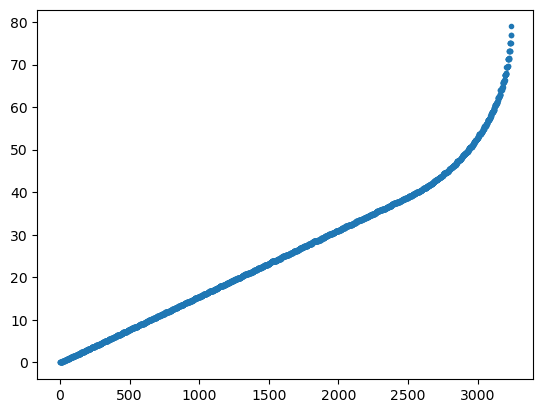

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f469b5bdc10>

In [203]:
plot(E2,".")

In [204]:
E2[1:10]

10-element Vector{Float64}:
 -0.018723230107474172
 -0.0032866184693281994
 -0.00244561597416865
  0.03029604041787319
  0.030834935654975963
  0.03166144424130664
  0.0806719234015011
  0.08097361683216693
  0.09541475647643288
  0.09625347614223127